In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train[train['Alley'].notnull()]['Alley'].head() # 길? 이런거인듯
droplist = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']

In [7]:
# train.dropna(axis=1).info()
# 이건 너무 막 다날리는 거니까 droplist를 활용해보자
train_drop = train.drop(droplist,axis=1)
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

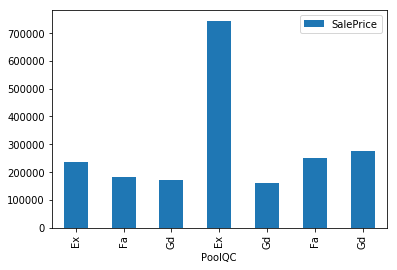

In [8]:
train[train['PoolQC'].notnull()][['PoolQC','SalePrice']].set_index("PoolQC").plot(kind='bar')

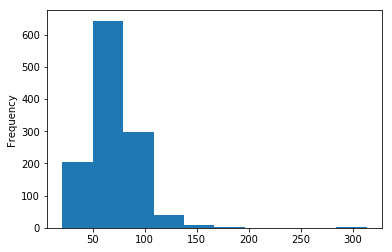

In [9]:
train_drop['LotFrontage'].plot(kind='hist') # 이건 그냥 중간값으로 채워도 될듯?

In [10]:
train_drop[['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
0,196.0,BrkFace
1,0.0,None
2,162.0,BrkFace
3,0.0,None
4,350.0,BrkFace
5,0.0,None
6,186.0,Stone
7,240.0,Stone
8,0.0,None
9,0.0,None


In [26]:
train_dropall = train_drop.dropna(axis=0)

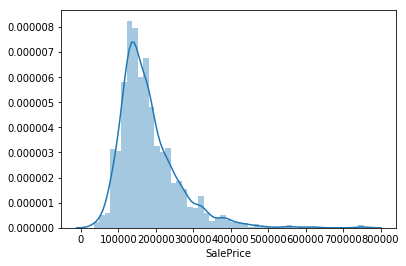

In [27]:
sns.distplot(train_drop['SalePrice'])

In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

In [12]:
all_data = pd.concat((train,test)).reset_index(drop=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [13]:
all_data.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2914,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
2915,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
2916,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
2917,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006
2918,996,1004,0,NaN,3,1Fam,TA,Av,758.0,0.0,...,WD,0,Pave,9,996.0,AllPub,190,1993,1994,2006


In [14]:
all_data.drop(['SalePrice'],axis=1,inplace=True)

In [15]:
all_data.drop(['Id'],axis=1,inplace=True)

In [16]:
all_data.shape

(2919, 79)

In [17]:
all_na = (all_data.isnull().sum() / len(all_data)) * 100
all_na = all_na.drop(all_na[all_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': all_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'percent of missing data by feature')

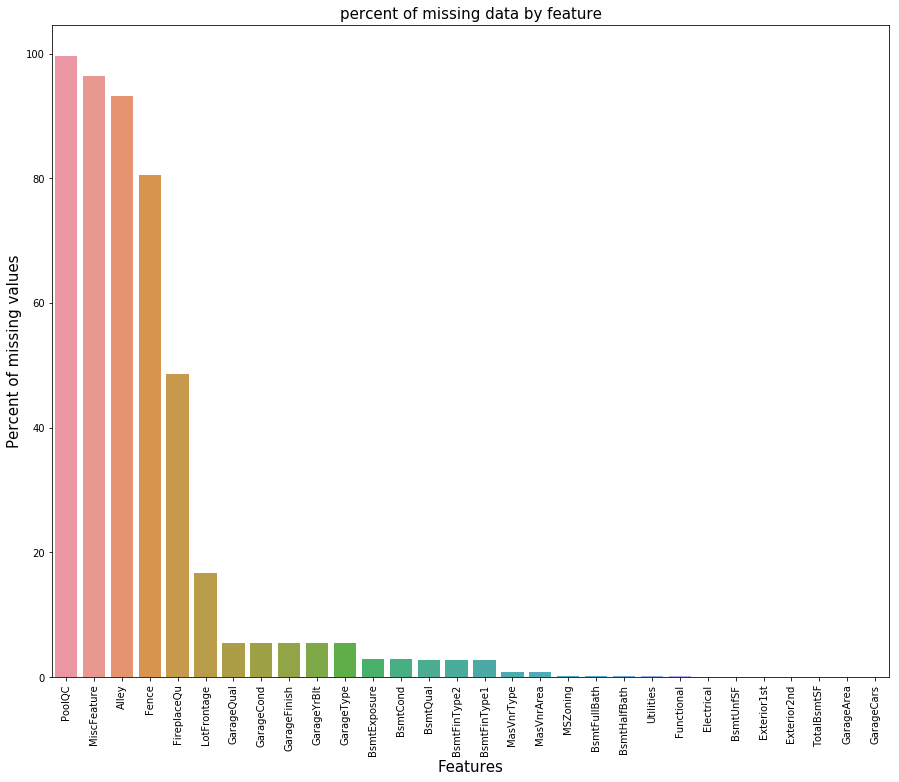

In [18]:
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Percent of missing values", fontsize=15)
plt.title('percent of missing data by feature', fontsize=15)

In [19]:
# 다 존나 찍어보는구나
all_data["PoolQC"].value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [20]:
# 근데 NAN 값을 그냥 0이나 'None' 넣네 걍...?
# 원래는 만약에 추측이 안되면 0, None 하고
# 대충 다수가 많다 싶으면 제일 많은 거 넣고
# 오케이
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [21]:
all_data["LotFrontage"].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [22]:
all_data.corr()[['1stFlrSF']].loc['1stFlrSF']

1stFlrSF    1.0
Name: 1stFlrSF, dtype: float64

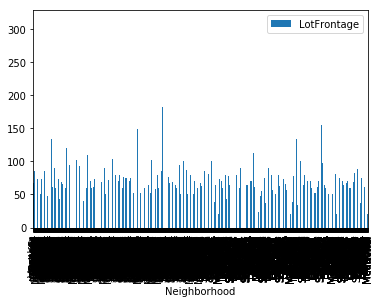

In [23]:
all_data[['Neighborhood','LotFrontage']].set_index("Neighborhood").plot(kind='bar')

In [24]:
all_data["LotFrontage"].fillna(all_data.groupby("Neighborhood")["LotFrontage"].transform("median"), inplace=True)

In [25]:
all_data[["Neighborhood","LotFrontage"]].head(30)

,Neighborhood,LotFrontage
0,CollgCr,65.0
1,Veenker,80.0
2,CollgCr,68.0
3,Crawfor,60.0
4,NoRidge,84.0
5,Mitchel,85.0
6,Somerst,75.0
7,NWAmes,80.0
8,OldTown,51.0
9,BrkSide,50.0


In [26]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [27]:
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

In [28]:
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [29]:
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr")

In [30]:
all_data['MSZoning'] = all_data['MSZoning'].fillna("RL")

In [31]:
all_data['Utilities'] = all_data['Utilities'].fillna("AllPub")

In [32]:
all_data['Functional'] = all_data['Functional'].fillna("Typ")

In [33]:
all_data['SaleType'] = all_data['SaleType'].fillna("WD")

In [34]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA")

In [35]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna("VinylSd")

In [36]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna("VinylSd")

In [37]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [40]:
all_data = all_data.fillna('None')

In [41]:
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index

In [43]:
all_data[numeric_features]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,5,7,0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,8,6,0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,5,7,0,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,5,7,0,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,5,8,0,0,9,1145.0,192,2000,2000,2008
5,796,566,320,1,732.0,0.0,1.0,0.0,64.0,0,...,5,5,0,0,5,796.0,40,1993,1995,2009
6,1694,0,0,3,1369.0,0.0,1.0,0.0,317.0,0,...,5,8,0,0,7,1686.0,255,2004,2005,2007
7,1107,983,0,3,859.0,32.0,1.0,0.0,216.0,228,...,6,7,0,0,7,1107.0,235,1973,1973,2009
8,1022,752,0,2,0.0,0.0,0.0,0.0,952.0,205,...,5,7,0,0,8,952.0,90,1931,1950,2008
9,1077,0,0,2,851.0,0.0,1.0,0.0,140.0,0,...,6,5,0,0,5,991.0,0,1939,1950,2008


In [44]:
all_data[numeric_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 35 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtUnfSF        2919 non-null float64
EnclosedPorch    2919 non-null int64
Fireplaces       2919 non-null int64
FullBath         2919 non-null int64
GarageArea       2919 non-null float64
GarageCars       2919 non-null float64
GrLivArea        2919 non-null int64
HalfBath         2919 non-null int64
KitchenAbvGr     2919 non-null int64
LotArea          2919 non-null int64
LotFrontage      2919 non-null float64
LowQualFinSF     2919 non-null int64
MSSubClass       2919 non-null int64
MasVnrArea       2919 non-null float64
MiscVal          2919 non-null int64
MoSold           2919 no

In [45]:
all_na = (all_data.isnull().sum() / len(all_data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)

,Missing Ratio


In [46]:
# 더 깊은 feature Enginnering
all_data["Utilities"].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [47]:
all_data.drop('Utilities', axis=1, inplace=True)

In [48]:
corr = train.corr(method='pearson').\
drop(['SalePrice']).sort_values('SalePrice',ascending=False)['SalePrice']

In [49]:
corr

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [50]:
# 상관계수 적은거는 날리기
all_data.drop('PoolArea', axis=1, inplace=True)
all_data.drop('MoSold', axis=1, inplace=True)
all_data.drop('3SsnPorch', axis=1, inplace=True)
all_data.drop('BsmtFinSF2', axis=1, inplace=True)
all_data.drop('BsmtHalfBath', axis=1, inplace=True)
all_data.drop('MiscVal', axis=1, inplace=True)
all_data.drop('LowQualFinSF', axis=1, inplace=True)
all_data.drop('YrSold', axis=1, inplace=True)
all_data.drop('OverallCond', axis=1, inplace=True)
all_data.drop('MSSubClass', axis=1, inplace=True)

In [51]:
all_data.shape

(2919, 68)

In [52]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew

In [57]:
all_data.dtypes.head()

1stFlrSF         int64
2ndFlrSF         int64
Alley           object
BedroomAbvGr     int64
BldgType        object
dtype: object

In [58]:
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index

In [59]:
numeric_features

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath',
       'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallQual',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [60]:
skewed_feats = all_data[numeric_features]\
.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
LotArea,12.822431
KitchenAbvGr,4.302254
EnclosedPorch,4.003891
ScreenPorch,3.946694
MasVnrArea,2.613592
OpenPorchSF,2.535114
WoodDeckSF,1.842433
LotFrontage,1.505704
1stFlrSF,1.469604
BsmtFinSF1,1.425230


In [61]:
skewness = skewness[abs(skewness)>0.5]

In [63]:
skewness

,Skew
LotArea,12.822431
KitchenAbvGr,4.302254
EnclosedPorch,4.003891
ScreenPorch,3.946694
MasVnrArea,2.613592
OpenPorchSF,2.535114
WoodDeckSF,1.842433
LotFrontage,1.505704
1stFlrSF,1.469604
BsmtFinSF1,1.425230


In [64]:
np.log1p(all_data[skewness.index])

,LotArea,KitchenAbvGr,EnclosedPorch,ScreenPorch,MasVnrArea,OpenPorchSF,WoodDeckSF,LotFrontage,1stFlrSF,BsmtFinSF1,...,Fireplaces,HalfBath,BsmtFullBath,BedroomAbvGr,GarageArea,OverallQual,FullBath,GarageCars,YearRemodAdd,YearBuilt
0,9.042040,0.693147,0.000000,0.000000,5.283204,4.127134,0.000000,4.189655,6.753438,6.561031,...,0.000000,0.693147,0.693147,1.386294,6.308098,2.079442,1.098612,1.098612,7.602900,7.602900
1,9.169623,0.693147,0.000000,0.000000,0.000000,0.000000,5.700444,4.394449,7.141245,6.886532,...,0.693147,0.000000,0.000000,1.386294,6.133398,1.945910,1.098612,1.098612,7.589336,7.589336
2,9.328212,0.693147,0.000000,0.000000,5.093750,3.761200,0.000000,4.234107,6.825460,6.188264,...,0.693147,0.693147,0.693147,1.386294,6.411818,2.079442,1.098612,1.098612,7.602401,7.601902
3,9.164401,0.693147,5.609472,0.000000,0.000000,3.583519,0.000000,4.110874,6.869014,5.379897,...,0.693147,0.000000,0.693147,1.386294,6.466145,2.079442,0.693147,1.386294,7.586296,7.557995
4,9.565284,0.693147,0.000000,0.000000,5.860786,4.442651,5.262690,4.442651,7.044033,6.486161,...,0.693147,0.693147,0.693147,1.609438,6.729824,2.197225,1.098612,1.386294,7.601402,7.601402
5,9.555064,0.693147,0.000000,0.000000,0.000000,3.433987,3.713572,4.454347,6.680855,6.597146,...,0.000000,0.693147,0.693147,0.693147,6.175867,1.791759,0.693147,1.098612,7.598900,7.597898
6,9.218804,0.693147,0.000000,0.000000,5.231109,4.060443,5.545177,4.330733,7.435438,7.222566,...,0.693147,0.000000,0.693147,1.386294,6.456770,2.197225,1.098612,1.098612,7.603898,7.603399
7,9.247925,0.693147,5.433722,0.000000,5.484797,5.323010,5.463832,4.394449,7.010312,6.756932,...,1.098612,0.693147,0.693147,1.386294,6.184149,2.079442,1.098612,1.098612,7.587817,7.587817
8,8.719481,1.098612,5.327876,0.000000,0.000000,0.000000,4.510860,3.951244,6.930495,0.000000,...,1.098612,0.000000,0.000000,1.098612,6.150603,2.079442,1.098612,1.098612,7.576097,7.566311
9,8.912069,1.098612,0.000000,0.000000,0.000000,1.609438,0.000000,3.931826,6.982863,6.747587,...,1.098612,0.000000,0.693147,1.098612,5.327876,1.791759,0.693147,0.693147,7.576097,7.570443


In [65]:
all_data[skewness.index] = np.log1p(all_data[skewness.index])

In [66]:
skewed_feats = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
KitchenAbvGr,3.520351
ScreenPorch,2.945905
EnclosedPorch,1.961081
HalfBath,0.580692
MasVnrArea,0.537018
BsmtFullBath,0.425167
2ndFlrSF,0.305049
Fireplaces,0.237587
WoodDeckSF,0.158033
1stFlrSF,0.064828


In [67]:
# categorial => labeling
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir')
# process columns, apply LabelEncoder to categorical features

In [68]:
all_data[list(cols)].FireplaceQu.value_counts()
# 카테고리얼 친구들!

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

In [69]:
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

In [70]:
all_data.shape

(2919, 68)

In [72]:
all_data.FireplaceQu.head()
# !!!!!! 개쉽게되는구만

0    3
1    5
2    5
3    2
4    5
Name: FireplaceQu, dtype: int64

In [73]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 68 columns):
1stFlrSF         2919 non-null float64
2ndFlrSF         2919 non-null float64
Alley            2919 non-null int64
BedroomAbvGr     2919 non-null float64
BldgType         2919 non-null object
BsmtCond         2919 non-null int64
BsmtExposure     2919 non-null int64
BsmtFinSF1       2919 non-null float64
BsmtFinType1     2919 non-null int64
BsmtFinType2     2919 non-null int64
BsmtFullBath     2919 non-null float64
BsmtQual         2919 non-null int64
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null int64
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null float64
ExterCond        2919 non-null int64
ExterQual        2919 non-null int64
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
Fence            2919 non-null int64
FireplaceQu      2919 

In [74]:
# 근데 아시다시피 이렇게 걍 숫자로만 하면 머신러닝이 숫자에 의미부여해서 안됨
# get_dummies 함수 쓰면 가변수 생성
all_data = pd.get_dummies(all_data)
all_data

,1stFlrSF,2ndFlrSF,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtFullBath,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,6.753438,6.751101,1,1.386294,4,3,6.561031,2,6,0.693147,...,0,0,0,0,0,0,0,0,0,1
1,7.141245,0.000000,1,1.386294,4,1,6.886532,0,6,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,6.825460,6.765039,1,1.386294,4,2,6.188264,2,6,0.693147,...,0,0,0,0,0,0,0,0,0,1
3,6.869014,6.629363,1,1.386294,1,3,5.379897,0,6,0.693147,...,0,0,0,0,0,0,0,0,0,1
4,7.044033,6.960348,1,1.609438,4,0,6.486161,2,6,0.693147,...,0,0,0,0,0,0,0,0,0,1
5,6.680855,6.340359,1,0.693147,4,3,6.597146,2,6,0.693147,...,0,0,0,0,0,0,0,0,0,1
6,7.435438,0.000000,1,1.386294,4,0,7.222566,2,6,0.693147,...,0,0,0,0,0,0,0,0,0,1
7,7.010312,6.891626,1,1.386294,4,2,6.756932,0,1,0.693147,...,0,0,0,0,0,0,0,0,0,1
8,6.930495,6.624065,1,1.098612,4,3,0.000000,6,6,0.000000,...,0,0,0,0,0,0,0,0,0,1
9,6.982863,0.000000,1,1.098612,4,3,6.747587,2,6,0.693147,...,0,0,0,0,0,0,0,0,0,1


In [75]:
all_data.shape

(2919, 313)

In [76]:
train.shape

(1460, 81)

In [77]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [80]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBRegressor

In [81]:
# 검증 함수

n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, \
        scoring="neg_mean_squared_error",cv=kf))
    return rmse

In [82]:
KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)

10

In [83]:
KFold(n_folds, shuffle=True, random_state=42)

KFold(n_splits=10, random_state=42, shuffle=True)

In [84]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [161]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)

# GPU 없이는 ㄴㄴ

In [85]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [86]:
model_svr = SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.0, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=150, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [88]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 26423.0637 (8087.4767)



In [89]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 26740.4713 (6207.2933)



In [90]:
score = rmsle_cv(model_svr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

SVR score: 80869.6066 (9390.1213)



In [91]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 313 entries, 1stFlrSF to SaleType_WD
dtypes: float64(25), int64(22), uint8(266)
memory usage: 1.8 MB


In [92]:
#define a rmsle evaluation function

def rmsle(y, y_pred): 
    return np.sqrt(mean_squared_error(y, y_pred))

model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

14182.606565285318


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in expm1
  


In [93]:
score = rmsle_cv(model_svr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

SVR score: 80869.6066 (9390.1213)



In [95]:
GBoost.fit(train,y_train)
GB_train_pred = GBoost.predict(train)
GB_pred = np.expm1(GBoost.predict(test.values))
print(rmsle(y_train, GB_train_pred))

14871.682867214557


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in expm1
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
GB_train_pred.shape

(1460,)

In [97]:
GB_test_pred = GBoost.predict(test)

In [98]:
test_ID = pd.Series(range(1461,2920))

In [99]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = GB_test_pred
sub.to_csv('submission.csv',index=False)

In [ ]:
# ok 결론 / 현재 작업자체는 문제가 없었으나, 검증 셋에서 무언가 오버플로우로 인해
# 점수가 제대로 체크되지 않았음. 차후에 알아보자